## Importing

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import os
import tempfile
import six.moves.urllib as urllib
import pprint

# Adult reconstructed

In [2]:
df = pd.read_csv('datasets/adult_reconstruction.csv')
df

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49526,65,35,0,0,Private,Bachelors,13,Married-civ-spouse,Husband,White,Male,Yugoslavia,85080,Farming-fishing
49527,77,37,3137,0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Vietnam,34137,Sales
49528,55,24,0,0,Private,Assoc-voc,11,Never-married,Not-in-family,White,Male,United-States,13016,Sales
49529,40,24,0,0,Private,Some-college,10,Never-married,Not-in-family,White,Female,United-States,15000,Adm-clerical


## Select categorical/discrete columns and pre-process target & protected attribute

In [3]:
columns_to_keep = ['age', 'workclass', 'education', 'marital-status', 
                   'occupation', 'native-country', 'relationship', 
                   'hours-per-week', 'gender', 'race', 'income']
df['income'] = df['income'].apply(lambda x: x>26000)
df['gender'] = df['gender'].apply(lambda x: int(x=='Male'))
df = df[columns_to_keep]
df

,age,workclass,education,marital-status,occupation,native-country,relationship,hours-per-week,gender,race,income
0,40,Private,Bachelors,Married-civ-spouse,Tech-support,United-States,Wife,20,0,White,True
1,21,Private,Some-college,Divorced,Craft-repair,United-States,Own-child,40,1,White,False
2,17,Private,11th,Never-married,Other-service,United-States,Own-child,10,1,White,False
3,51,Private,HS-grad,Married-civ-spouse,Sales,Cambodia,Husband,50,1,Asian-Pac-Islander,True
4,28,Private,Bachelors,Never-married,Exec-managerial,?,Not-in-family,38,1,White,True
...,...,...,...,...,...,...,...,...,...,...,...
49526,35,Private,Bachelors,Married-civ-spouse,Farming-fishing,Yugoslavia,Husband,65,1,White,True
49527,37,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Vietnam,Husband,77,1,Asian-Pac-Islander,True
49528,24,Private,Assoc-voc,Never-married,Sales,United-States,Not-in-family,55,1,White,False
49529,24,Private,Some-college,Never-married,Adm-clerical,United-States,Not-in-family,40,0,White,False


## Detecting Missing Values

In [4]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         2859
education            0
marital-status       0
occupation        2869
native-country     859
relationship         0
hours-per-week       0
gender               0
race                 0
income               0
dtype: int64

## Cleaning missing data 

In [5]:
df['native-country'].replace('?', np.nan, inplace=True)
df['workclass'].replace('?', np.nan, inplace=True )
df['occupation'].replace('?', np.nan, inplace=True )

#dropping the NaN rows now 
df.dropna(how='any', inplace=True)
df.reset_index(inplace=True, drop=True)
df

,age,workclass,education,marital-status,occupation,native-country,relationship,hours-per-week,gender,race,income
0,40,Private,Bachelors,Married-civ-spouse,Tech-support,United-States,Wife,20,0,White,True
1,21,Private,Some-college,Divorced,Craft-repair,United-States,Own-child,40,1,White,False
2,17,Private,11th,Never-married,Other-service,United-States,Own-child,10,1,White,False
3,51,Private,HS-grad,Married-civ-spouse,Sales,Cambodia,Husband,50,1,Asian-Pac-Islander,True
4,26,Private,Bachelors,Never-married,Exec-managerial,United-States,Not-in-family,38,1,White,True
...,...,...,...,...,...,...,...,...,...,...,...
45844,35,Private,Bachelors,Married-civ-spouse,Farming-fishing,Yugoslavia,Husband,65,1,White,True
45845,37,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Vietnam,Husband,77,1,Asian-Pac-Islander,True
45846,24,Private,Assoc-voc,Never-married,Sales,United-States,Not-in-family,55,1,White,False
45847,24,Private,Some-college,Never-married,Adm-clerical,United-States,Not-in-family,40,0,White,False


## Checking attributes

In [6]:
for col in df.columns:
    print(col,":", len(df[col].unique()))
    print(sorted(df[col].unique()))
    print("=================================================================")

age : 74
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
workclass : 7
['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
education : 16
['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
marital-status : 7
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
occupation : 14
['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-sup

## Encoding columns

In [7]:
LE = LabelEncoder()

attributes = df.columns

for col in attributes:

    df[col] = LE.fit_transform(df[col])
df

,age,workclass,education,marital-status,occupation,native-country,relationship,hours-per-week,gender,race,income
0,23,2,9,2,12,38,5,19,0,4,1
1,4,2,15,0,2,38,3,39,1,4,0
2,0,2,1,4,7,38,3,9,1,4,0
3,34,2,11,2,11,0,0,49,1,1,1
4,9,2,9,4,3,38,1,37,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
45844,18,2,9,2,4,40,0,64,1,4,1
45845,20,4,9,2,11,39,0,75,1,1,1
45846,7,2,8,4,11,38,1,54,1,4,0
45847,7,2,15,4,0,38,1,39,0,4,0


## Checking attributes after LabelEncoder

In [8]:
for col in df.columns:
    print(col,":", len(df[col].unique()))
    print(sorted(df[col].unique()))
    print("=================================================================")

age : 74
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
workclass : 7
[0, 1, 2, 3, 4, 5, 6]
education : 16
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
marital-status : 7
[0, 1, 2, 3, 4, 5, 6]
occupation : 14
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
native-country : 41
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
relationship : 6
[0, 1, 2, 3, 4, 5]
hours-per-week : 96
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 

## Analysis of 1-way distributions

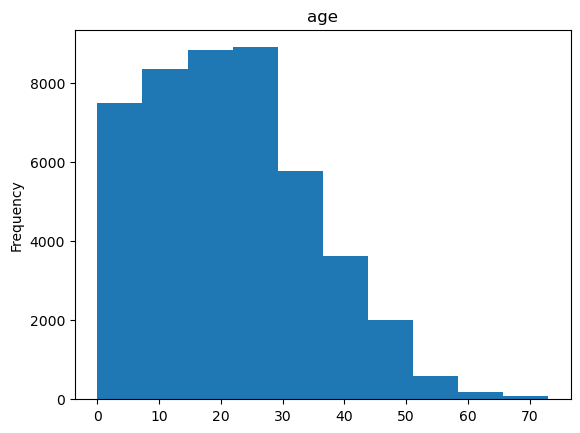

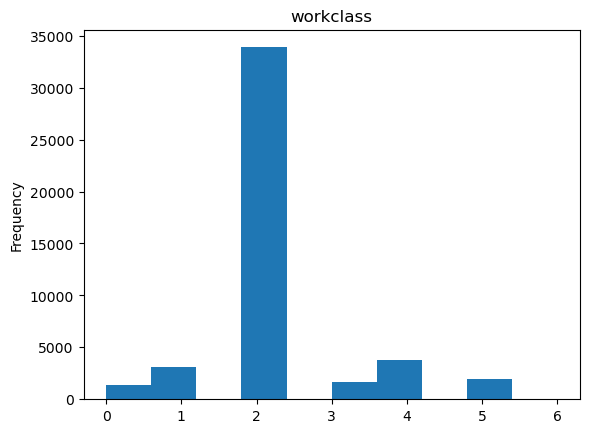

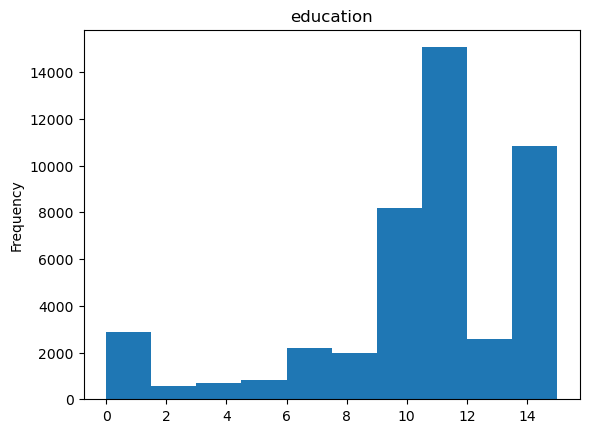

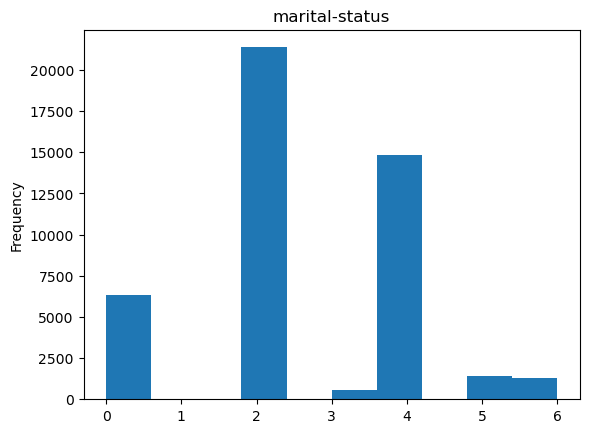

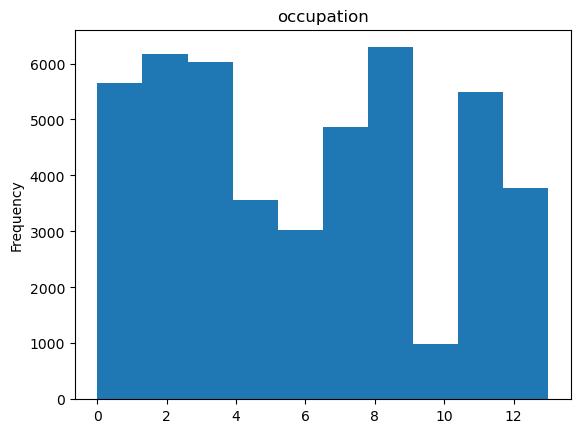

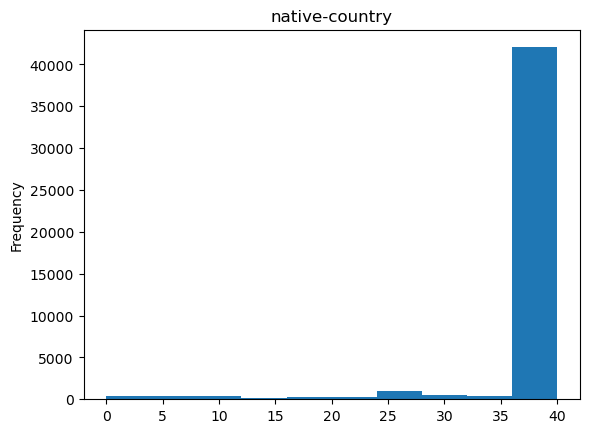

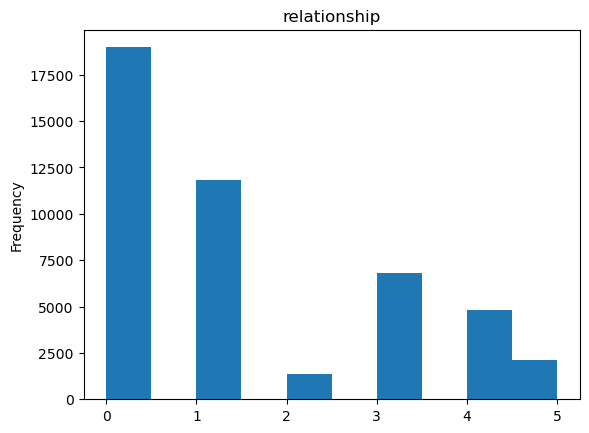

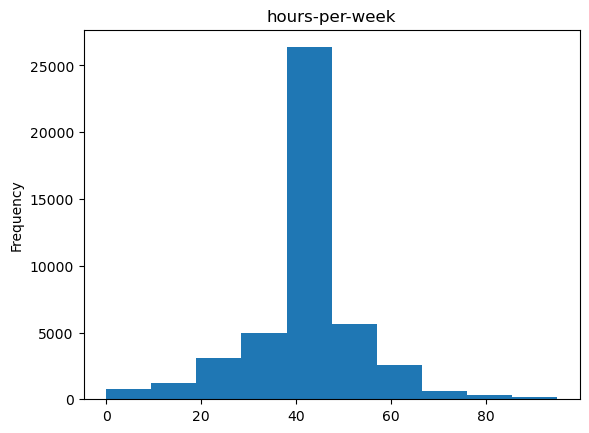

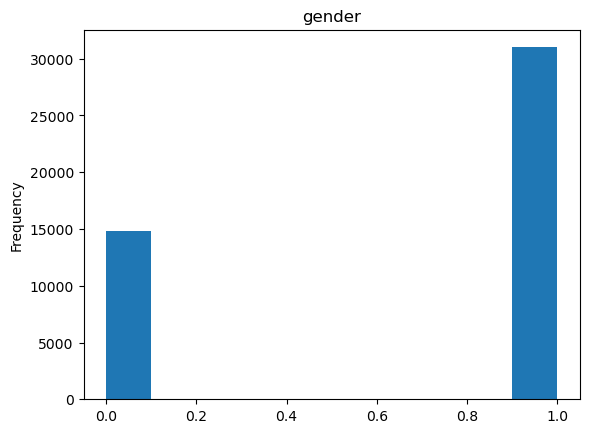

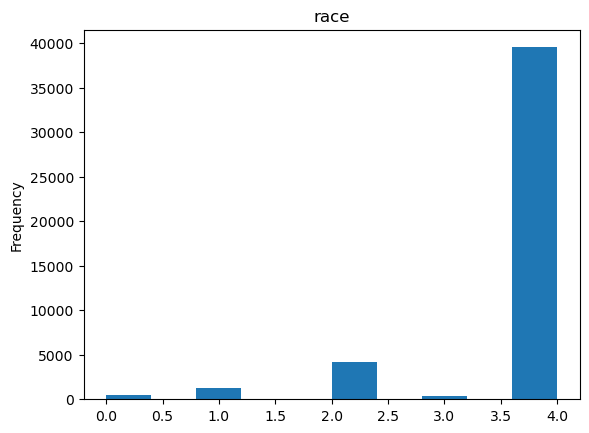

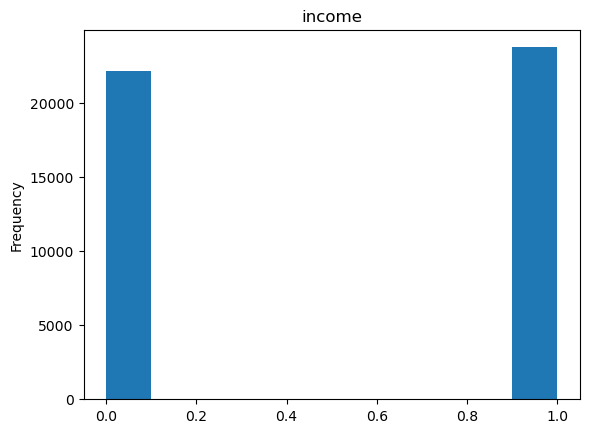

In [9]:
for col in df.columns:
    plt.figure()
    df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [10]:
df.to_csv('datasets/db_adult_processed_26k.csv', index=False)

# Law School dataset

In [16]:
def round_off_rating(number):
    """Round a number to the closest half integer.
    >>> round_off_rating(1.3)
    1.5
    >>> round_off_rating(2.6)
    2.5
    >>> round_off_rating(3.0)
    3.0
    >>> round_off_rating(4.1)
    4.0"""

    return round(number * 2) / 2

In [17]:
# Download the LSAT dataset and setup the required filepaths.
_DATA_ROOT = tempfile.mkdtemp(prefix='lsat-data')
_DATA_PATH = 'https://storage.googleapis.com/lawschool_dataset/bar_pass_prediction.csv'
_DATA_FILEPATH = os.path.join(_DATA_ROOT, 'bar_pass_prediction.csv')

data = urllib.request.urlopen(_DATA_PATH)

df = pd.read_csv(data)

# To simpliy the case study, we will only use the columns that will be used for
# our model.
_COLUMN_NAMES = [
  'fam_inc',
  'gender',
  'fulltime',
  'race1',
  'lsat',
  'ugpa',
  'pass_bar'
]

#dropping the NaN rows now 
df.dropna(how='any', inplace=True)
df['gender'] = df['gender'].astype(str)
df['race1'] = df['race1'].astype(str).apply(lambda x: int(x!='black'))
df['ugpa'] = df['ugpa'].apply(lambda x: round_off_rating(x))
df['lsat'] = df['lsat'].apply(lambda x: np.rint(x))
df = df[_COLUMN_NAMES]

df

,fam_inc,gender,fulltime,race1,lsat,ugpa,pass_bar
0,5.0,female,1.0,1,44.0,3.5,1.0
1,4.0,female,1.0,1,29.0,3.5,1.0
2,1.0,male,1.0,1,36.0,3.5,1.0
3,4.0,male,1.0,1,39.0,3.5,1.0
4,4.0,male,1.0,1,48.0,3.5,1.0
...,...,...,...,...,...,...,...
22402,2.0,male,1.0,0,26.0,2.0,0.0
22403,3.0,male,1.0,0,20.0,2.0,0.0
22404,3.0,male,2.0,0,36.0,2.0,1.0
22405,3.0,male,2.0,1,44.0,1.5,1.0


## Checking attributes

In [18]:
for col in df.columns:
    print(col,":", len(df[col].unique()))
    print(sorted(df[col].unique()))
    print("=================================================================")

fam_inc : 5
[1.0, 2.0, 3.0, 4.0, 5.0]
gender : 2
['female', 'male']
fulltime : 2
[1.0, 2.0]
race1 : 2
[0, 1]
lsat : 37
[11.0, 12.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0]
ugpa : 6
[1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
pass_bar : 2
[0.0, 1.0]


## Encoding columns

In [19]:
LE = LabelEncoder()

attributes = df.columns

for col in attributes:

    df[col] = LE.fit_transform(df[col])
df

,fam_inc,gender,fulltime,race1,lsat,ugpa,pass_bar
0,4,0,0,1,32,4,1
1,3,0,0,1,17,4,1
2,0,1,0,1,24,4,1
3,3,1,0,1,27,4,1
4,3,1,0,1,36,4,1
...,...,...,...,...,...,...,...
22402,1,1,0,0,14,1,0
22403,2,1,0,0,8,1,0
22404,2,1,1,0,24,1,1
22405,2,1,1,1,32,0,1


## Checking attributes after LabelEncoder

In [21]:
for col in df.columns:
    print(col,":", len(df[col].unique()))
    print(sorted(df[col].unique()))
    print("=================================================================")

fam_inc : 5
[0, 1, 2, 3, 4]
gender : 2
[0, 1]
fulltime : 2
[0, 1]
race1 : 2
[0, 1]
lsat : 37
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
ugpa : 6
[0, 1, 2, 3, 4, 5]
pass_bar : 2
[0, 1]


## Analysis of 1-way distributions

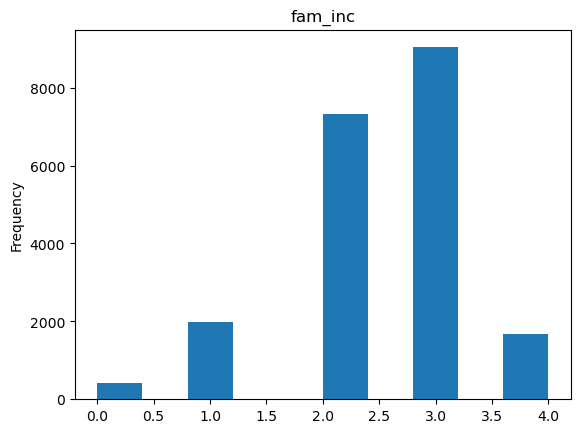

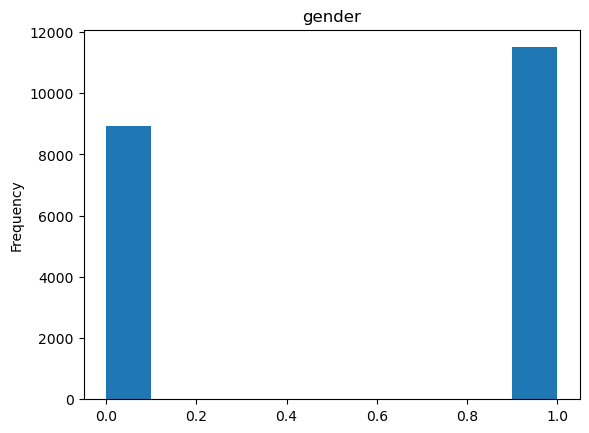

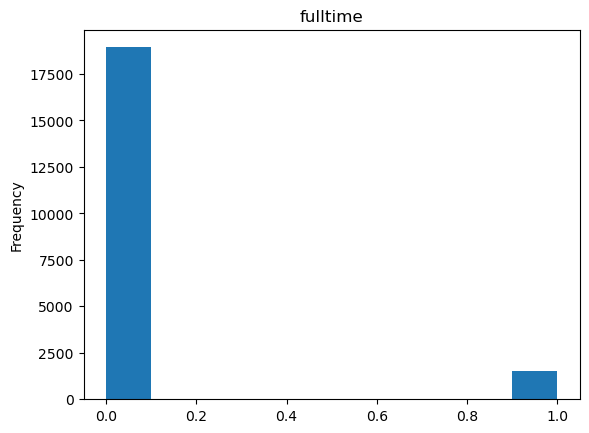

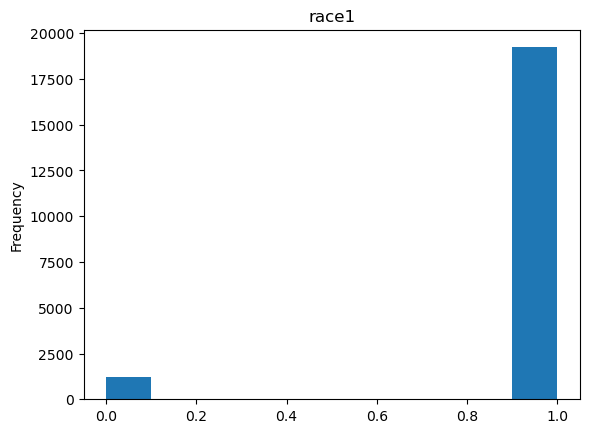

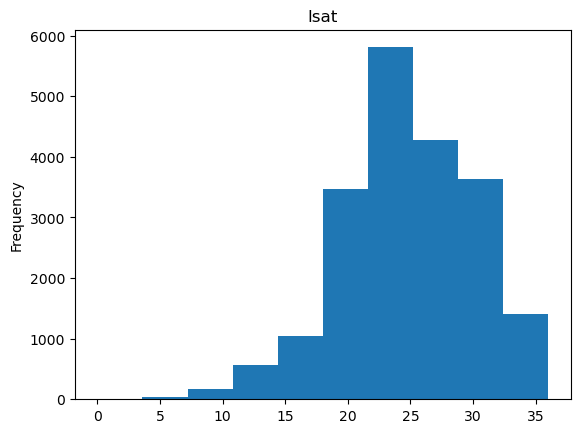

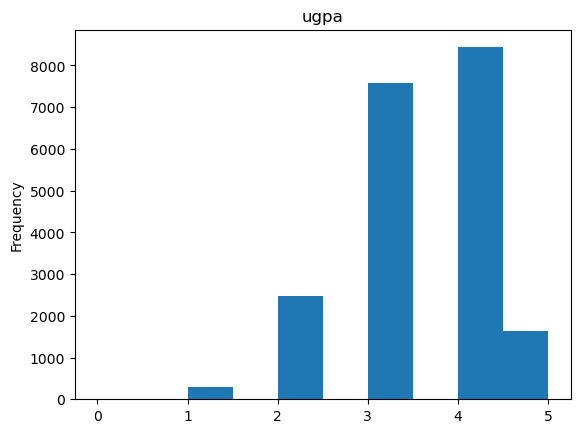

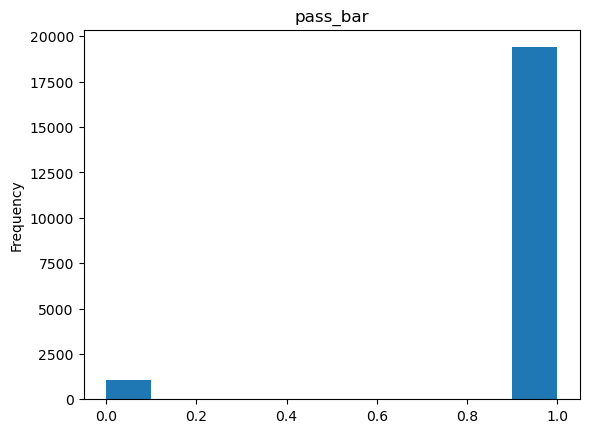

In [22]:
for col in df.columns:
    plt.figure()
    df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [38]:
df.to_csv("datasets/db_LSAC.csv", index=False)

## ACSCoverage

In [11]:
df = pd.read_csv("datasets/ds_coverage.csv")
del df['DEAR']
del df['DEYE']
del df['DREM']
del df["PINCP"]
df

,AGEP,SCHL,MAR,SEX,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,ESR,ST,FER,RAC1P,PUBCOV
0,21,16.0,5,0,0,0.0,1,1.0,4.0,1,1,1.0,48,2.0,1,0
1,19,16.0,5,0,0,0.0,1,1.0,4.0,1,1,6.0,48,2.0,0,1
2,24,12.0,5,1,1,0.0,1,1.0,4.0,1,1,6.0,48,0.0,1,0
3,31,17.0,5,1,0,0.0,1,3.0,4.0,4,1,1.0,48,0.0,0,0
4,27,18.0,5,1,0,0.0,1,1.0,4.0,2,1,6.0,48,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98734,63,16.0,1,1,0,0.0,4,1.0,4.0,1,2,6.0,48,0.0,0,0
98735,60,16.0,1,0,0,0.0,1,1.0,4.0,1,1,6.0,48,0.0,0,0
98736,19,19.0,5,1,0,0.0,1,1.0,4.0,2,1,1.0,48,0.0,0,0
98737,24,19.0,5,1,0,0.0,1,1.0,4.0,2,1,1.0,48,0.0,0,0


## Checking attributes

In [12]:
for col in df.columns:
    print(col,":", len(df[col].unique()))
    print(df[col].unique())
    print("=================================================================")

AGEP : 50
[21 19 24 31 27 39 30 48 52 18 25 26 20 23 51 44 28 49 33 56 47 17 32 40
 46 22 64 38 54 35 59 50 58 37 34 29 36 43 45 60 41 42 55 63 62 16 53 61
 15 57]
SCHL : 24
[16. 12. 17. 18. 21. 13. 19.  4. 14. 20. 15.  7. 10. 11. 22.  8.  1.  9.
  5.  6. 24. 23.  3.  2.]
MAR : 5
[5 1 4 3 2]
SEX : 2
[0 1]
DIS : 2
[0 1]
ESP : 9
[0. 4. 7. 2. 1. 3. 6. 5. 8.]
CIT : 5
[1 5 4 2 3]
MIG : 3
[1. 3. 2.]
MIL : 5
[4. 1. 2. 3. 0.]
ANC : 4
[1 4 2 3]
NATIVITY : 2
[1 2]
ESR : 7
[1. 6. 4. 3. 2. 0. 5.]
ST : 1
[48]
FER : 3
[2. 0. 1.]
RAC1P : 2
[1 0]
PUBCOV : 2
[0 1]


## Encoding columns

In [13]:
LE = LabelEncoder()

attributes = df.columns

for col in attributes:

    df[col] = LE.fit_transform(df[col])
df

,AGEP,SCHL,MAR,SEX,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,ESR,ST,FER,RAC1P,PUBCOV
0,6,15,4,0,0,0,0,0,4,0,0,1,0,2,1,0
1,4,15,4,0,0,0,0,0,4,0,0,6,0,2,0,1
2,9,11,4,1,1,0,0,0,4,0,0,6,0,0,1,0
3,16,16,4,1,0,0,0,2,4,3,0,1,0,0,0,0
4,12,17,4,1,0,0,0,0,4,1,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98734,48,15,0,1,0,0,3,0,4,0,1,6,0,0,0,0
98735,45,15,0,0,0,0,0,0,4,0,0,6,0,0,0,0
98736,4,18,4,1,0,0,0,0,4,1,0,1,0,0,0,0
98737,9,18,4,1,0,0,0,0,4,1,0,1,0,0,0,0


## Checking attributes after LabelEncoder

In [14]:
for col in df.columns:
    print(col,":", len(df[col].unique()))
    print(df[col].unique())
    print("=================================================================")

AGEP : 50
[ 6  4  9 16 12 24 15 33 37  3 10 11  5  8 36 29 13 34 18 41 32  2 17 25
 31  7 49 23 39 20 44 35 43 22 19 14 21 28 30 45 26 27 40 48 47  1 38 46
  0 42]
SCHL : 24
[15 11 16 17 20 12 18  3 13 19 14  6  9 10 21  7  0  8  4  5 23 22  2  1]
MAR : 5
[4 0 3 2 1]
SEX : 2
[0 1]
DIS : 2
[0 1]
ESP : 9
[0 4 7 2 1 3 6 5 8]
CIT : 5
[0 4 3 1 2]
MIG : 3
[0 2 1]
MIL : 5
[4 1 2 3 0]
ANC : 4
[0 3 1 2]
NATIVITY : 2
[0 1]
ESR : 7
[1 6 4 3 2 0 5]
ST : 1
[0]
FER : 3
[2 0 1]
RAC1P : 2
[1 0]
PUBCOV : 2
[0 1]


## Analysis of 1-way distributions

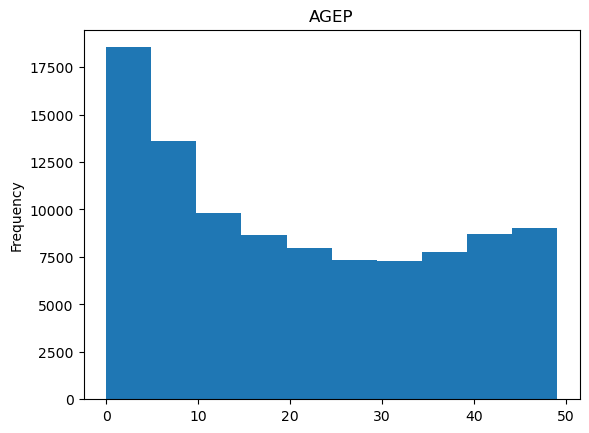

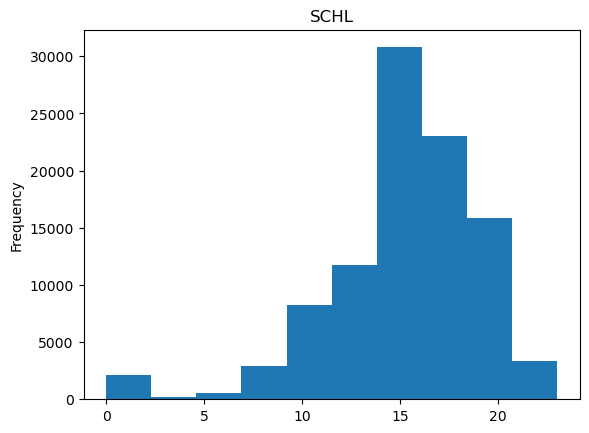

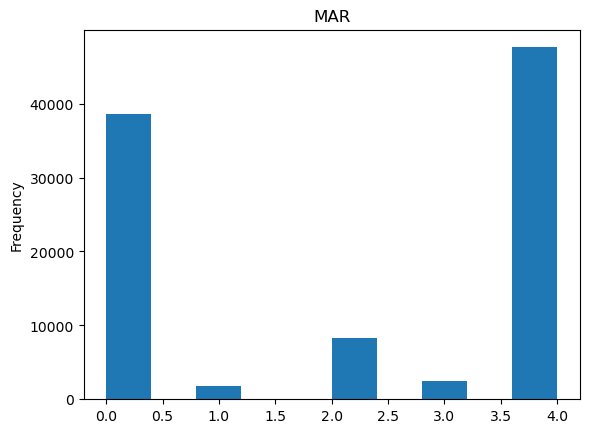

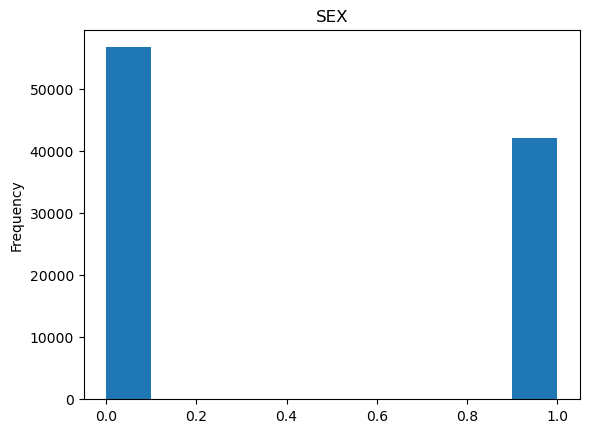

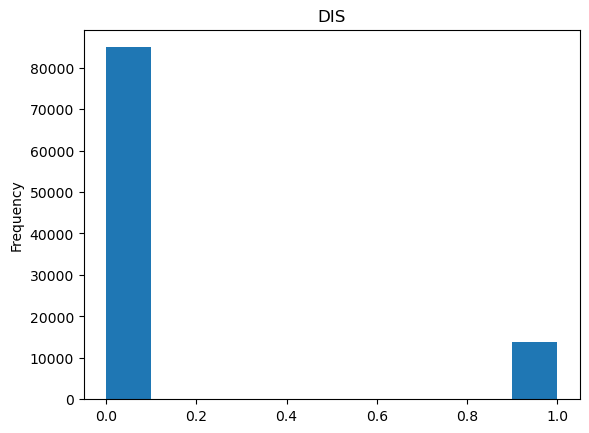

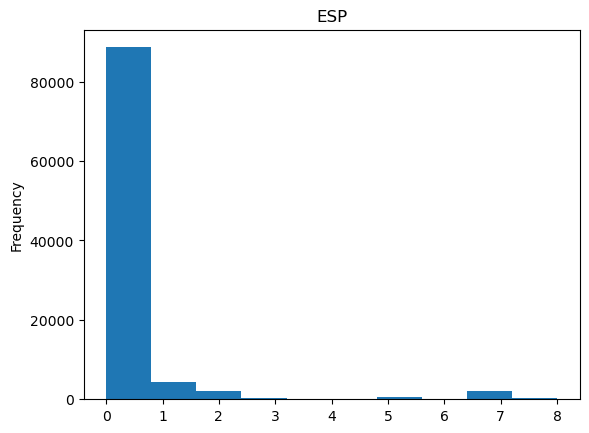

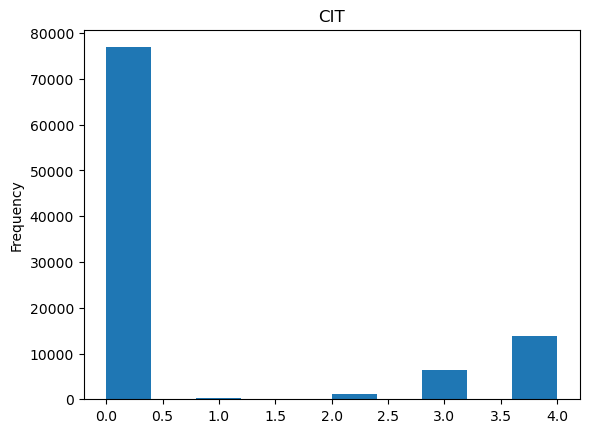

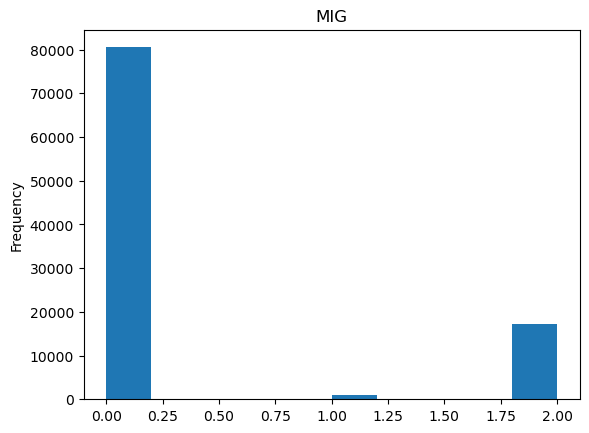

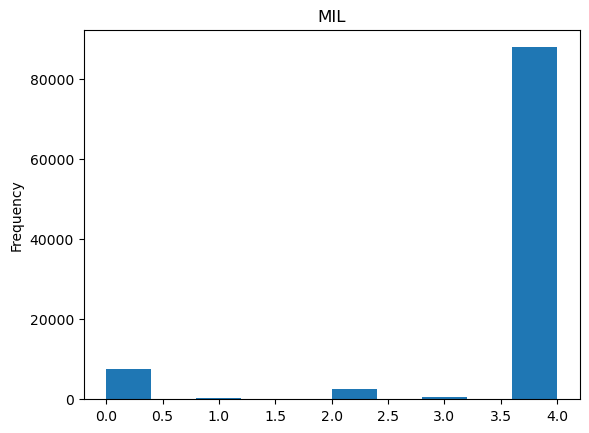

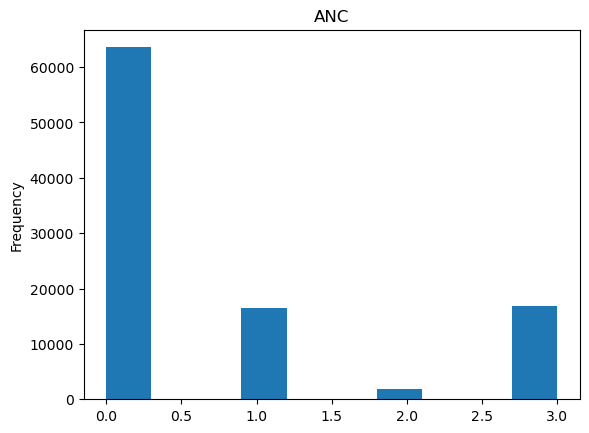

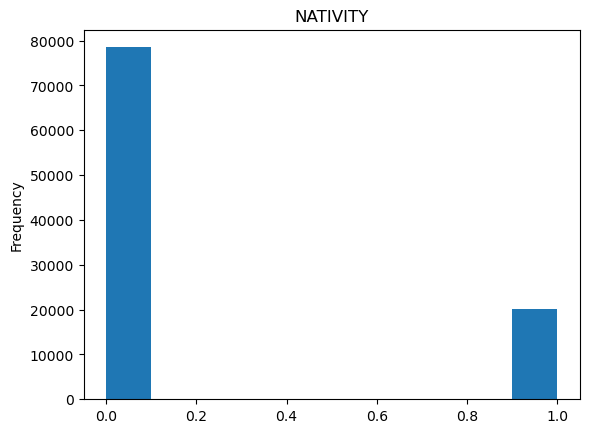

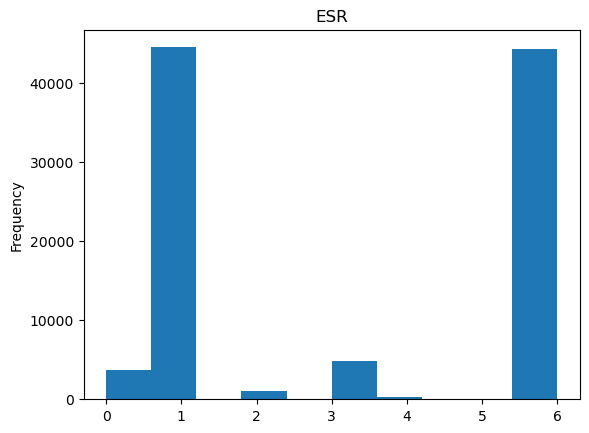

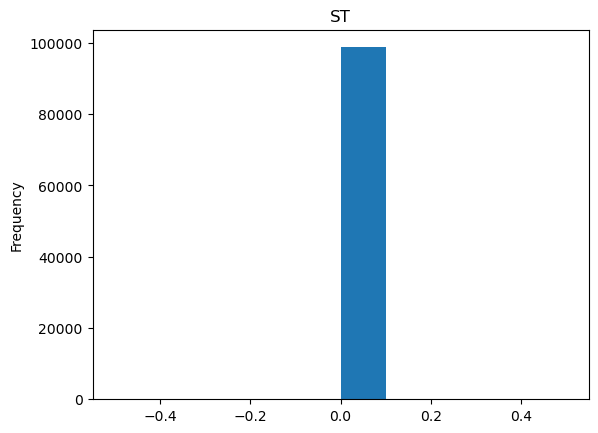

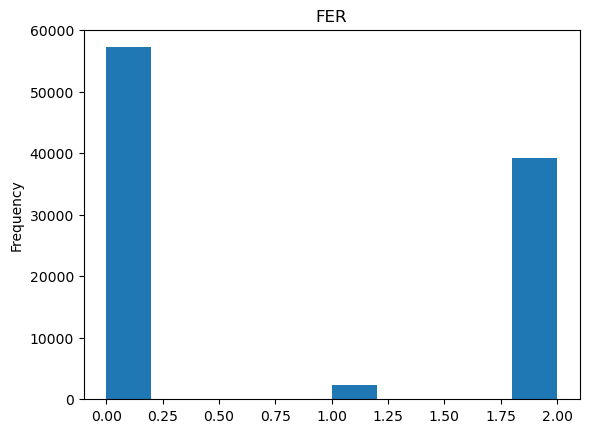

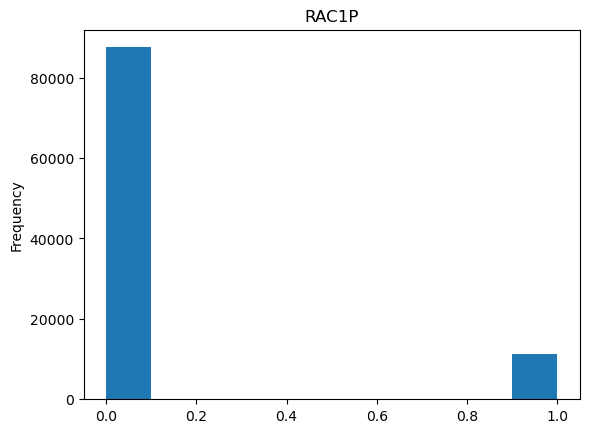

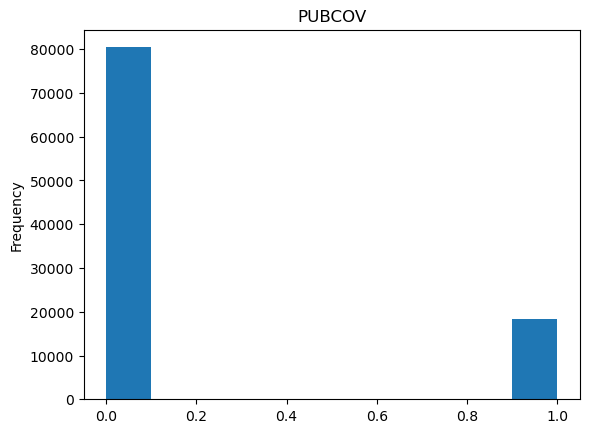

In [15]:
for col in df.columns:
    plt.figure()
    df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [8]:
df.to_csv("datasets/db_ACSCoverage.csv", index=False)